<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=200 height=150 />


# EXAMEN RECUPERACIÓN PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Endara Carrillo, Daniela Natasha** 


# Ribosomas 
Los ribosomas son unas estructuras o partículas citoplásmicas formadas por ribonucleoproteínas, que son la unión de ARN ribosómicos con proteínas ribosomales.Los ribosomas en las células eucarióticas se encuentran en la membrana del retículo endoplasmático. La estructura general de los ribosomas procarióticos y eucarióticos consta de una subunidad pequeña, una subunidad grande y dos sedes, la sede aminoacídica (Sede A) lugar de entrada de los ARN-t cargados con un aminoácido (aminoacil-ARN-t) y la sede peptídica (Sede P) lugar en el que se encuentran los ARN-t cargados con un péptido (peptidil-ARN-t) (Dincova,2009). 

<img src="https://t2.ev.ltmcdn.com/es/posts/5/9/7/ribosomas_funcion_y_estructura_3795_600.jpg" width=500 height=300 />

Por otro lado, el ribosoma esta implicado en el proceso de traducción de ADN. Como sabemos la traducción implica decodificar el ARNm y usar esta información para formar una proteina. El ARNm tiene en el tres nucleotidos llamados codones que seran las instrucciones para formar la proteina. En la traducción, los codones de un ARNm se leen mediante moléculas llamadas ARNt de transferencia. Los ARNt se unen a los ARNm en el ribosoma. A medida que los ARNt entran a los espacios en el ribosoma y se unen a los codones, sus aminoácidos se unen a la cadena de polipéptidos creciente en una reacción química. El resultado final es un polipéptido

<img src="https://cdn.kastatic.org/ka-perseus-images/2d05e1ed3456e514fa978a750a8e47b691712e36.png" width=500 height=300 />

Como dijimos la estrucctura del ribosoma consta de dos subunidades, una grande otra pequeña. Ambas estas relacionanas con el procesos de traduccion, y ayudan al ARNt y al ARNm a unirse. Primero, el ARNt que lleva metioina se une a la subunidad ribosomal pequeña. Juntos, se unen al extremo 5' del ARNm al reconocer el casquete de GTP 5' (que se agregó durante el procesamiento en el núcleo). Luego, "caminan" sobre el ARNm en la dirección 3', y se detienen cuando llegan al codon de inicio. (Blanc, 2019).


<img <img src="https://cdn.kastatic.org/ka-perseus-images/1e646e6644b4d1ec3799a9d767e0e60a68d7f93f.png" width=500 height=300 />" 

## PREGUNTA 1

In [ ]:
https://github.com/Danielanatasha/2022_Recuperacion.git

## PREGUNTA 2 

In [38]:
from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import Entrez
import re
import os 
from Bio.Align.Applications import ClustalwCommandline

id_total = ["NM_002295", "NM_002952", "NM_001005", "NM_001006", "NM_001007", "NM_001008", "NM_001039567", "NM_001009", "NM_001010","NM_001011"]

out_sequence = open("secuencias1.gb", "w")

records = []
comentarios = []
l_celula_sana = []
l_celula_enferma = []
seq_enferma = []
seq_sana = []
id_enferma = []
id_sana = []

In [39]:
Entrez.email = "daniela.endara@est.ikiam.edu.ec" 
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id= id_total
                  ) as handle: 
    for seq_record in SeqIO.parse(handle, "gb"): 
        out_sequence.write(str(seq_record))
        record = seq_record.annotations 
        records.append(record)
        comentarios.append(record["comment"])

        if "cancer" in record["comment"]:
            l_celula_enferma.append(len(seq_record))
            seq_enferma.append(repr(seq_record.seq))
            id_enferma.append(seq_record.id)
            print ("celula enferma")
        else: 
            l_celula_sana.append(len(seq_record))
            seq_sana.append(repr(seq_record.seq))
            id_sana.append(seq_record.id)
            print ("celula sana")
            
print ("\n", record["comment"], "\n")

celula enferma
celula sana
celula sana
celula sana
celula sana
celula sana
celula sana
celula enferma
celula sana
celula sana

 REVIEWED REFSEQ: This record has been curated by NCBI staff in
collaboration with Francesco Amaldi. The reference sequence was
derived from BU963807.1, BC002866.2 and BF312642.1.
This sequence is a reference standard in the RefSeqGene project.
On May 11, 2018 this sequence version replaced NM_001011.3.
Summary: Ribosomes, the organelles that catalyze protein synthesis,
consist of a small 40S subunit and a large 60S subunit. Together
these subunits are composed of 4 RNA species and approximately 80
structurally distinct proteins. This gene encodes a ribosomal
protein that is a component of the 40S subunit. The protein belongs
to the S7E family of ribosomal proteins. It is located in the
cytoplasm. As is typical for genes encoding ribosomal proteins,
there are multiple processed pseudogenes of this gene dispersed
through the genome. [provided by RefSeq, Jul 2008

## PREGUNTA 3

In [40]:
import matplotlib
import matplotlib.pyplot as plt
plt.hist(l_celula_sana, bins = 5, color = "purple", rwidth=0.7)
plt.title("Celulas sanas")
plt.xlabel("Longitud de secuencia")
plt.ylabel("Frecuencia")
plt.show()

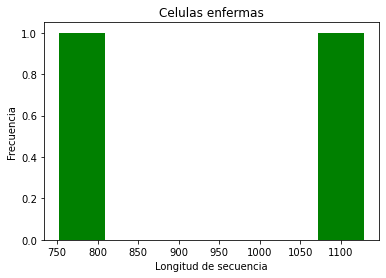

In [41]:
plt.hist(l_celula_enferma, bins = 5, color = "green", rwidth=0.7)
plt.title("Celulas enfermas")
plt.xlabel("Longitud de secuencia")
plt.ylabel("Frecuencia")
plt.show()

Analisis de secuencias, se hizo el ploteo de dos histogramas; en el primero es relacionado a celulas sanas y el segundo a celuals enfermas. 

En el primer grafico se puede observar que los valores son distribuidos ampliamente y se encontraron secuencias en un rango de 1000 a 2000 con una frecuencia mayoritaria en los valores cercanos a los 800 a 1000 pb. Con el minado de datos se pueden distinguir que las secuencias sanas fueron las que presentaron mayores registros alrededor de 8 secuencias y las enfermas unicamente 2 secuencias. 

## PREGUNTA 4 

In [36]:
from Bio import Entrez
id_total = id_sana + id_enferma


out_sequence = open("secuencias1.fasta", "w")

for linea in id_total:  
    Entrez.email="daniela.endara@est.ikiam.edu.ec"
    handle=Entrez.efetch(db="nucleotide" ,id=linea ,rettype="fasta", retmode="text")
    data=(handle.read())
    out_sequence.write(data)
out_sequence.close()

In [42]:
clustalw_exe = "/Users/danielaendara/clustalw-2.1-macosx/ClustalW2/clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "secuencias1.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)
ClustalAlign = AlignIO.read("secuencias1.aln", "clustal")
print(ClustalAlign)
tree = Phylo.read("secuencias1.dnd", "newick")

AssertionError: Clustal_W executable is missing or not found

In [ ]:
with open("secuencias1.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
    
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')
 
distance_matrix = calculator.get_distance(alignment)


from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

# Construir el arbol 
align_total = constructor.build_tree(alignment)
align_total.rooted = True
Phylo.write(align_total, "align_protein_ribosomal.xml", "phyloxml")

align_protein_ribosomal = Phylo.read(file="align_protein_ribosomal.xml", format= "phyloxml")

# Arbol elemental en Matplotlib
import matplotlib
import matplotlib.pyplot as plt
fig = Phylo.draw(cis_tree)

fig = plt.figure(figsize=(30, 40), dpi=100)  
matplotlib.rc('font', size=20)             
matplotlib.rc('xtick', labelsize=20)       
matplotlib.rc('ytick', labelsize=20)       
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(align_protein_ribosomal, axes=axes)
fig.savefig("align_protein_ribosomal.jpg")

### Referencia Bibliograficas 
Bank (2019). Dogma de la biologia molecular. Recuperado de http://www5.udec.cl/cade/wp-content/uploads/2020/08/biologia-biologia-molecular-dogma-de-la-biologia-molecular.pdf
Din
